In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import pygame

pygame 2.6.1 (SDL 2.28.4, Python 3.12.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


/home/tim/miniconda3/envs/Opt1/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


# Erster Versuch, naiver ansatz
## chat gpt zur inspiration

In [ ]:
# chat gpt:
import pygame
import numpy as np

# ---------- Dynamik-Modelle ----------
def f_lin(d, vmax):
    return vmax * (1 - 1/d)

def f_log(d, vmax):
    return vmax * np.log(d)


# ---------- Simulation ----------
def step_euler(x, vmax, L, dt, model):
    N = len(x)
    dx = np.zeros(N)

    # Leader
    dx[-1] = vmax

    # Followers
    for i in range(N - 1):
        d = abs(x[i+1] - x[i]) / L
        if d <= 0:
            d = 0.001
        if model == "lin":
            dx[i] = f_lin(d, vmax)
        else:
            dx[i] = f_log(d, vmax)

    return x + dt * dx, dx


# ---------- Visualisierung (Pygame) ----------
def run_simulation(x0, vmax=30, L=4.5, dt=0.05, model="lin"):
    pygame.init()
    W, H = 1000, 200
    screen = pygame.display.set_mode((W, H))
    clock = pygame.time.Clock()

    x = np.array(x0, dtype=float)
    scale = 5     # skaliert Meter → Pixel

    running = True
    while running:
        clock.tick(60)  # FPS
        
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False

        # Berechne Dynamik
        x, v = step_euler(x, vmax, L, dt, model)

        # Zeichnen
        screen.fill((30, 30, 30))

        for i in range(len(x)):
            px = int(x[i] * scale) % W    # wrap-around
            py = H // 2

            # Auto
            pygame.draw.circle(screen, (100, 200, 255), (px, py), 8)

            # Geschwindigkeitspfeil
            vx = int(v[i] * 0.4)     # skaliert für Anzeige
            pygame.draw.line(screen, (255, 160, 60), (px, py), (px + vx, py), 3)

        pygame.display.flip()

    pygame.quit()


# ------------ START ------------
x0 = [0, 8, 18, 30]       # Startpositionen
run_simulation(x0, model="log")


## Angepasst 

In [4]:
def f (d, v_max, model = "log"):
    if model == "log":
        return v_max * np.log(d)
    else: # lin
        return v_max * (1 - 1/d)
    
def simulate(x_0, v_max, L, T, dt, model = "lin"):
    N = len(x_0) # Number of initial values == number of vehicles in traffic
    steps = int(T/dt) # ges Zeit durch time steps

    x = np.zeros((steps, N)) # initialize array to store each time step N for each position of x
    x[0]=x_0.copy() # initial conditions einlesen
    
    for k in range(steps-1):
        dx = np.zeros(N) # momente initialisieren

        dx[-1] = v_max # Maximales moment ist bekannt

        for i in range(N-1):
            d = abs(x[k, i+1] - x[k, i])/L # Abstand zum nächsten fahrzeug
            dx[i] = f(d, v_max, model)
        
        x[k+1] = x[k] + dt * dx

    return x

def single_step(x, v_max, L, dt, model):
    N = len(x) # Number of initial values == number of vehicles in traffic
    dx = np.zeros(N) # momente initialisieren
    # Leader
    # dx[-1] = v_max
    for i in range(N):
            if i == N-1:
                d = abs(x[0] - x[i])/L # Abstand vom letzten zum ersten fahrzeug
            else: 
                d = abs(x[i+1] - x[i])/L # Abstand zum nächsten fahrzeug
            dx[i] = f(d, v_max, model)
        
    return x + dt * dx, dx


x0 = np.array([0.0, 5.0, 12.0, 20.0])  # 4 Fahrzeuge
result = simulate(x0, v_max=30, L=7.5, T=20, dt=0.01, model="lin")

In [1]:
def simulation_screen(x0, v_max, L, dt, model):
    pygame.init()
    W, H = 2500, 200
    screen = pygame.display.set_mode((W, H))
    clock = pygame.time.Clock()
    scale = 1     # skaliert Meter → Pixel
    running = True
    x = np.array(x0, dtype=float)
    while running:
        clock.tick(60) # 60 FPS
        
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False             # Stop when closed
        
        x, v = single_step(x, v_max, L, dt, model)

        screen.fill((30, 30, 30))

        for i in range(len(x)):
            px = int(x[i]*scale)% W # start again from the beginning of the screen if done with the lap
            py = H // 2 # bewegt sich auf der hälfter der screen höhe
            if i == len(x)-1:
                pygame.draw.circle(screen, (255, 200, 100), (px, py), 8) #cars
            else:
                pygame.draw.circle(screen, (100, 200, 255), (px, py), 8) #cars

            #vx = int(v[i] *0.4) # 0.4 skarilerungs faktor für weniger clutter
            #pygame.draw.line(screen, (255, 160, 60), (py, py), (px+vx, py), 3)  #geschwindigkeits indikator linie
            # Geschwindigkeitspfeil
            vx = int(v[i] * 4)     # skaliert für Anzeige
            pygame.draw.line(screen, (255, 160, 60), (px, py), (px + vx, py), 3)

        pygame.display.flip() # display and render 
    pygame.quit()

x0 = [100, 150, 170, 300]       # Startpositionen
simulation_screen(x0, v_max=30, L=30, dt=0.05, model="log")

NameError: name 'pygame' is not defined

Es fällt auf, dass das erste Auto der Gruppe beim loopen, dem letzten einfach direkt auffährt. Die naive idee, das das nächste element in x auch der nähste nachbar ist ist nicht gegeben !


# neue abstands funktion

In [15]:
def d(x, max_W = 2000, loop = True): # Abstandsfunktion, damit immer des nächste auto VOR dem derzeitig betrachteten auto berücksichtigt wird
    d = np.ones_like(x) * 10**10 # anfangs distanz auf sehr groß setzen
    for i in range(len(x)):
        for j in range(len(x)):
            if i == j:
                continue
            else:
                d[i] = x[j]-x[i] if d[i] > x[j]-x[i] and x[j]-x[i] > 0 else d[i]
            if loop and i == len(x)-1: # abnhängig von der breite der anzeige wird nun der abstand zu den anderen autos überprüft
                d[i] = x[j]-((x[i]-max_W)) if d[i] > x[j]-(x[i]-max_W) and x[j]-(x[i]-max_W) > 0 else d[i]
    return d
            
x0, d(x0, max_W=2500)

([110, 115, 117, 130, 140, 145, 149, 150, 151, 160],
 array([   5,    2,   13,   10,    5,    4,    1,    1,    9, 2450]))

In [4]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import pygame


def f (d, v_max, model = "log"):
    if model == "log":
        return v_max * np.log(d)
    else: # lin
        return v_max * (1 - 1/d)


def d(x, max_W = 2000, loop = True): # Abstandsfunktion, damit immer des nächste auto VOR dem derzeitig betrachteten auto berücksichtigt wird
    d = np.ones_like(x) * 10**10 # anfangs distanz auf sehr groß setzen
    for i in range(len(x)):
        for j in range(len(x)):
            if i == j:
                continue
            else:
                d[i] = x[j]-x[i] if d[i] > x[j]-x[i] and x[j]-x[i] > 0 else d[i]
            if loop and i == len(x)-1: # abnhängig von der breite der anzeige wird nun der abstand zu den anderen autos überprüft
                d[i] = x[j]-((x[i]-max_W)) if d[i] > x[j]-(x[i]-max_W) and x[j]-(x[i]-max_W) > 0 else d[i]
    return d


def single_step(x, v_max, L, dt, model, max_W):
    N = len(x) # Number of initial values == number of vehicles in traffic
    dx = np.zeros(N) # momente initialisieren
    # Leader
    # dx[-1] = v_max
    dist = d(x, max_W)
    for i in range(N):
            
            dx[i] = f(dist[i], v_max, model)
        
    return x + dt * dx, dx


def simulation_screen(x0, v_max, L, dt, model):
    pygame.init()
    W, H = 1500, 200
    screen = pygame.display.set_mode((W, H))
    clock = pygame.time.Clock()
    scale = 1     # skaliert Meter → Pixel
    running = True
    x = np.array(x0, dtype=float)
    while running:
        clock.tick(60) # 60 FPS
        
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False             # Stop when closed
        
        x, v = single_step(x, v_max, L, dt, model, max_W = W)

        screen.fill((30, 30, 30))

        for i in range(len(x)):
            px = int(x[i]*scale)% W # start again from the beginning of the screen if done with the lap
            py = H // 2 # bewegt sich auf der hälfter der screen höhe
            if i == len(x)-1:
                pygame.draw.circle(screen, (255, 200, 100), (px, py), 8) #cars
            else:
                pygame.draw.circle(screen, (100, 200, 255), (px, py), 8) #cars

            #vx = int(v[i] *0.4) # 0.4 skarilerungs faktor für weniger clutter
            #pygame.draw.line(screen, (255, 160, 60), (py, py), (px+vx, py), 3)  #geschwindigkeits indikator linie
            # Geschwindigkeitspfeil
            vx = int(v[i] * 0.2)     # skaliert für Anzeige
            pygame.draw.line(screen, (255, 160, 60), (px, py), (px + vx, py), 3)

        pygame.display.flip() # display and render 
    pygame.quit()

x0 = [110, 115, 117, 130, 140, 145, 149, 150, 151, 160]       # Startpositionen
simulation_screen(x0, v_max=60, L=30, dt=0.05, model="log")

sehr schöne aber schnell siche einpendelnde dynamik, was ist wenn zufällige stöhrungen passieren, z.b. zufälliges Bremsen?

# zufällige stöhrung
Bremsen soll hier sein, das zu einer gewissen chance ein auto einen kleineren schritt macht als berechnet wurde. 

In [14]:
counter = 0
for i in range(10000):
    if np.random.randint(0, 100) < 10: # zu ~10% wird dies passieren
        counter += 1
        
print(f"das waren nun in etwa {counter/10000 * 100}%")

das waren nun in etwa 9.81%


dafür benötigen wir einen höheren order term, die geschwindigkeit vom vorherigen Punkt muss die des aktuellen beeinflussen

In [ ]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import pygame


def f (d, v_max, model = "log"):
    if model == "log":
        return v_max * np.log(d)
    else: # lin
        return v_max * (1 - 1/d)


def d(x, max_W = 2000, loop = True): # Abstandsfunktion, damit immer des nächste auto VOR dem derzeitig betrachteten auto berücksichtigt wird
    d = np.ones_like(x) * 10**10 # anfangs distanz auf sehr groß setzen
    for i in range(len(x)):
        for j in range(len(x)):
            if i == j:
                continue
            else:
                d[i] = x[j]-x[i] if d[i] > x[j]-x[i] and x[j]-x[i] > 0 else d[i]
            if loop and i == len(x)-1: # abnhängig von der breite der anzeige wird nun der abstand zu den anderen autos überprüft
                d[i] = x[j]-((x[i]-max_W)) if d[i] > x[j]-(x[i]-max_W) and x[j]-(x[i]-max_W) > 0 else d[i]
    return d


def max(a, b):
    if a > b:
        return a
    else:
        return b


def single_step(x, v, v_max, L, dt, model, max_W):
    N = len(x) # Number of initial values == number of vehicles in traffic
    dx = np.zeros(N) # momente initialisieren
    dist = d(x, max_W)
    for i in range(N):
            dx[i] = max(f(dist[i], v_max, model) + 1/2 v[i] *dt, v_max) # v wird als beschleunigung interpretiert für momentum
    return x + dt * dx,  dx # Ort, Geschwidigkeit



def simulation_screen(x0, v0, v_max, L, dt, model):
    pygame.init()
    W, H = 2500, 200
    screen = pygame.display.set_mode((W, H))
    clock = pygame.time.Clock()
    scale = 10     # skaliert Meter → Pixel
    running = True
    x = np.array(x0, dtype=float)
    v = np.array(v0, dtype=float)
    while running:
        clock.tick(60) # 60 FPS
        
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False             # Stop when closed
        
        x, v = single_step(x, v, v_max, L, dt, model, max_W = W)

        screen.fill((30, 30, 30))

        for i in range(len(x)):
            px = int(x[i]*scale)% W # start again from the beginning of the screen if done with the lap
            py = H // 2 # bewegt sich auf der hälfter der screen höhe
            if i == len(x)-1:
                pygame.draw.circle(screen, (255, 200, 100), (px, py), 8) #cars
            else:
                pygame.draw.circle(screen, (100, 200, 255), (px, py), 8) #cars

            #vx = int(v[i] *0.4) # 0.4 skarilerungs faktor für weniger clutter
            #pygame.draw.line(screen, (255, 160, 60), (py, py), (px+vx, py), 3)  #geschwindigkeits indikator linie
            # Geschwindigkeitspfeil
            vx = int(v[i] * 0.2)     # skaliert für Anzeige
            pygame.draw.line(screen, (255, 160, 60), (px, py), (px + vx, py), 3)

        pygame.display.flip() # display and render 
    pygame.quit()

x0 = [110, 115, 117, 130, 140, 145, 149, 150, 151, 160]  # Startpositionen
v0 = np.zeros_like(x0) # Startgeschwindigkeit
simulation_screen(x0, v0, v_max=0.1, L=300, dt=0.05, model="lin")

/home/tim/miniconda3/envs/Opt1/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


pygame 2.6.1 (SDL 2.28.4, Python 3.12.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


die geschwindigkeiit ist nicht korrekt eingebaut!!


# Sinnvolle parameter bereiche

In [17]:
# Bei 60 FPS mit maximalgeschwindigkeit v_max -beliebig
v_max_bel = 10
# FPS*v_max == 600 Pixel pro sekunde
# 10px = 1 m -> 100 km/h = 1000/3600 m/s != 277px/s -> v_max_soll = 277/60 = 4.63
v_max = 4.63 # für 60 fps sollte ca 100 km/h enstprechen wenn 10 pixel einem meter entsprechen

In [18]:
# Bei einer Geschwindigkeit von 100 km/h wird empfohlen 50m sicherheitsabstand zu halten
# Dies enspricht 500 px
L = 500

In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import pygame


def f (d, v_max, model = "log"):
    if model == "log":
        return v_max * np.log(d)
    else: # lin
        return v_max * (1 - 1/d)


def d(x, max_W = 2000, loop = True): # Abstandsfunktion, damit immer des nächste auto VOR dem derzeitig betrachteten auto berücksichtigt wird
    d = np.ones_like(x) * 10**10 # anfangs distanz auf sehr groß setzen
    for i in range(len(x)):
        for j in range(len(x)):
            if i == j:
                continue
            else:
                d[i] = x[j]-x[i] if d[i] > x[j]-x[i] and x[j]-x[i] > 0 else d[i]
            if loop and i == len(x)-1: # abnhängig von der breite der anzeige wird nun der abstand zu den anderen autos überprüft
                d[i] = x[j]-((x[i]-max_W)) if d[i] > x[j]-(x[i]-max_W) and x[j]-(x[i]-max_W) > 0 else d[i]
    return d


def single_step(x, v_max, L, dt, model, max_W):
    N = len(x) # Number of initial values == number of vehicles in traffic
    dx = np.zeros(N) # momente initialisieren
    # Leader
    # dx[-1] = v_max
    dist = d(x, max_W)
    for i in range(N):
            
            dx[i] = f(dist[i], v_max, model)
        
    return x + dt * dx, dx


def simulation_screen(x0, v_max, L, dt, model):
    pygame.init()
    W, H = 1500, 200
    screen = pygame.display.set_mode((W, H))
    clock = pygame.time.Clock()
    scale = 10     # skaliert Meter → Pixel
    running = True
    x = np.array(x0, dtype=float)
    while running:
        clock.tick(60) # 60 FPS
        
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False             # Stop when closed
        
        x, v = single_step(x, v_max, L, dt, model, max_W = W)

        screen.fill((30, 30, 30))

        for i in range(len(x)):
            px = int(x[i]*scale)% W # start again from the beginning of the screen if done with the lap
            py = H // 2 # bewegt sich auf der hälfter der screen höhe
            if i == len(x)-1:
                pygame.draw.circle(screen, (255, 200, 100), (px, py), 8) #cars
            else:
                pygame.draw.circle(screen, (100, 200, 255), (px, py), 8) #cars

            #vx = int(v[i] *0.4) # 0.4 skarilerungs faktor für weniger clutter
            #pygame.draw.line(screen, (255, 160, 60), (py, py), (px+vx, py), 3)  #geschwindigkeits indikator linie
            # Geschwindigkeitspfeil
            vx = int(v[i] * 2)     # skaliert für Anzeige
            pygame.draw.line(screen, (255, 160, 60), (px, py), (px + vx, py), 3)

        pygame.display.flip() # display and render 
    pygame.quit()

pygame 2.6.1 (SDL 2.28.4, Python 3.12.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


/home/tim/miniconda3/envs/Opt1/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


In [ ]:
# Parameter
N = 4 # Anzahl autos
FPS = 60
scale_m_zu_px = 10
v_kmh = 100
v_max = v_kmh * scale_m_zu_px / FPS * 1000/3600 # km/h -> m/s
Sicherheitsabstand_m = 50 
L =  Sicherheitsabstand_m * scale_m_zu_px
x0 = np.arange(100, 100+40*N, step=40)      # Startpositionen

print((v_max, L, x0))
simulation_screen(x0, v_max, L, dt=1/FPS, model="log")


(4.62962962962963, 500, array([100, 140, 180, 220]))


# Autos im kreis fahren lassen

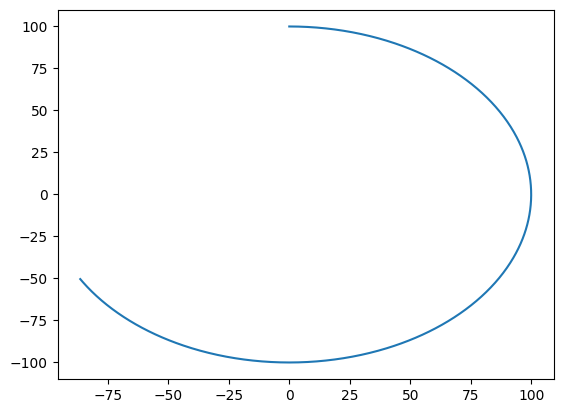

In [2]:
rad = 100
def project(x):
    return rad * np.exp(2j*x*np.pi/1500)

plt.plot(np.imag(project(np.arange(1000))), np.real(project(np.arange(1000))))

In [1]:

import numpy as np
import scipy
from matplotlib import pyplot as plt
import pygame


def f (d, v_max, model = "log"):
    if model == "log":
        return v_max * np.log(d)
    else: # lin
        return v_max * (1 - 1/d)


def d(x, max_W = 2000, loop = True): # Abstandsfunktion, damit immer des nächste auto VOR dem derzeitig betrachteten auto berücksichtigt wird
    d = np.ones_like(x) * 10**10 # anfangs distanz auf sehr groß setzen
    for i in range(len(x)):
        for j in range(len(x)):
            if i == j:
                continue
            else:
                d[i] = x[j]-x[i] if d[i] > x[j]-x[i] and x[j]-x[i] > 0 else d[i]
            if loop and i == len(x)-1: # abnhängig von der breite der anzeige wird nun der abstand zu den anderen autos überprüft
                d[i] = x[j]-((x[i]-max_W)) if d[i] > x[j]-(x[i]-max_W) and x[j]-(x[i]-max_W) > 0 else d[i]
    return d


def single_step(x, v_max, L, dt, model, max_W):
    N = len(x) # Number of initial values == number of vehicles in traffic
    dx = np.zeros(N) # momente initialisieren
    # Leader
    # dx[-1] = v_max
    dist = d(x, max_W)
    for i in range(N):
            
            dx[i] = f(dist[i], v_max, model)
        
    return x + dt * dx, dx


def project(x, W):
    return W//2 * np.exp(2j*x*np.pi/W)


def simulation_screen_circ(x0, v_max, L, dt, model):
	pygame.init()
	W, H = 1000, 1000
	screen = pygame.display.set_mode((W, H))
	clock = pygame.time.Clock()
	scale = 10     # skaliert Meter → Pixel
	running = True
	x = np.array(x0, dtype=float)
	while running:
		clock.tick(60) # 60 FPS

		for event in pygame.event.get():
			if event.type == pygame.QUIT:
				running = False             # Stop when closed

		x, v = single_step(x, v_max, L, dt, model, max_W = W)
		projection = project(x, W = W)
		screen.fill((30, 30, 30))
		for i, px, py in zip(range(len(x)), np.round(np.real(projection)) + W//2, np.round(np.imag(projection)) + W//2): # + W//2 um das zentrum in die mitte zu verschieben   
			# px start again from the beginning of the screen if done with the lap
			# py bewegt sich auf der hälfter der screen höhe
			if i == len(x)-1:
				pygame.draw.circle(screen, (255, 200, 100), (px, py), 8) #cars
			else:
				pygame.draw.circle(screen, (100, 200, 255), (px, py), 8) #cars

			#vx = int(v[i] *0.4) # 0.4 skarilerungs faktor für weniger clutter
			#pygame.draw.line(screen, (255, 160, 60), (py, py), (px+vx, py), 3)  #geschwindigkeits indikator linie
			# Geschwindigkeitspfeil
			vx = int(v[i] * 2)     # skaliert für Anzeige
			pygame.draw.line(screen, (255, 160, 60), (px, py), (px + vx, py), 3)

		pygame.display.flip() # display and render 
	pygame.quit()

pygame 2.6.1 (SDL 2.28.4, Python 3.12.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


/home/tim/miniconda3/envs/Opt1/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


In [3]:
# Parameter
N = 10 # Anzahl autos
FPS = 60
scale_m_zu_px = 10
v_kmh = 100
v_max = v_kmh * scale_m_zu_px / FPS * 1000/3600 # km/h -> m/s
Sicherheitsabstand_m = 50 
L =  Sicherheitsabstand_m * scale_m_zu_px
x0 = np.arange(100, 100+30*N, step=30)      # Startpositionen

print((v_max, L, x0))
simulation_screen_circ(x0, v_max, L, dt=10/FPS, model="log")

(4.62962962962963, 500, array([100, 130, 160, 190, 220, 250, 280, 310, 340, 370]))


### Sieht schon echt gut aus, die gschwindigkeitslinie ist jedoch nicht entlang der bewegungsrichtung
## Wichtiger, die abstands funktion kann mittels dieser transformation imformuliert werden

In [10]:
def d_old(x, max_W = 2000, loop = True): # Abstandsfunktion, damit immer des nächste auto VOR dem derzeitig betrachteten auto berücksichtigt wird
    d = np.ones_like(x) * 10**10 # anfangs distanz auf sehr groß setzen
    for i in range(len(x)):
        for j in range(len(x)):
            if i == j:
                continue
            else:
                d[i] = x[j]-x[i] if d[i] > x[j]-x[i] and x[j]-x[i] > 0 else d[i]
            if loop and i == len(x)-1: # abnhängig von der breite der anzeige wird nun der abstand zu den anderen autos überprüft
                d[i] = x[j]-((x[i]-max_W)) if d[i] > x[j]-(x[i]-max_W) and x[j]-(x[i]-max_W) > 0 else d[i]
    return d

def project(x, W):
    return W//2 * np.exp(2j*x*np.pi/W)

def d(x, max_W = 2000): # Abstandsfunktion, damit immer des nächste auto VOR dem derzeitig betrachteten auto berücksichtigt wird
	x_trans = project(x0, max_W)
	angles = np.angle(x_trans)                     # (n,) Winkel der Punkte
	angle_diff = (angles[None, :] - angles[:, None]) % (2 * np.pi)
	angle_diff[angle_diff == 0] = 2*np.pi
	d_ind = np.where(angle_diff == np.min(angle_diff, 0))[1] # indizes der nächsten autos 
	res = np.ones_like(x)
	for i, j in enumerate(d_ind):
		if j > i:
			res[i] = np.abs(x[j] - x[i])
		else:
			res[i] = np.abs(x[j] - x[i] + max_W)
	return res

In [11]:
d_old(x0, 1000), d(x0, 1000)

(array([ 30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,
         30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,
         30,  30,  30, 130]),
 array([ 30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,
         30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,
         30,  30,  30, 130]))

In [12]:
# Parameter
N = 30 # Anzahl autos
FPS = 60
scale_m_zu_px = 10
v_kmh = 100
v_max = v_kmh * scale_m_zu_px / FPS * 1000/3600 # km/h -> m/s
Sicherheitsabstand_m = 50 
L =  Sicherheitsabstand_m * scale_m_zu_px
x0 = np.arange(100, 100+30*N, step=30)      # Startpositionen

x_trans = project(x0, 1500)
res = (x_trans[:, None] - x_trans[None, :]) 
res[res == 0] = 1500
res

array([[ 1500.           +0.j        ,    43.63589811  -83.46777472j,
           97.38900024 -160.8083529j ,   160.41158785 -230.80202742j,
          231.70975709 -292.34495621j,   310.15909323 -344.46657053j,
          394.52240339 -386.34488138j,   483.46922777 -417.31944279j,
          575.59682181 -436.90176742j,   669.45227832 -444.7830303j ,
          763.55544068 -440.83893922j,   856.42224581 -425.13169485j,
          946.58812872 -397.90900981j,  1032.63111957 -359.60020212j,
         1113.194269   -310.80942454j,  1187.007048   -252.3061368j ,
         1252.90538497 -185.01297069j,  1309.85002376 -109.99117963j,
         1356.94291341  -28.42390208j,  1393.44137091  +58.40249725j,
         1418.76979378 +149.11871419j,  1432.52873767 +242.29409981j,
         1434.50121581 +336.4592226j ,  1424.65612103 +430.12904234j,
         1403.14871638 +521.82633002j,  1370.31818646 +610.10496461j,
         1326.68228835 +693.57273934j,  1272.92918623 +770.91331752j,
         1209.906598

In [ ]:
# Parameter
N = 30 # Anzahl autos
FPS = 60
scale_m_zu_px = 10
v_kmh = 100
v_max = v_kmh * scale_m_zu_px / FPS * 1000/3600 # km/h -> m/s
Sicherheitsabstand_m = 50 
L =  Sicherheitsabstand_m * scale_m_zu_px
x0 = np.arange(100, 100+30*N, step=30)      # Startpositionen

x_trans = project(x0, 1500)
angles = np.angle(x_trans)                     # (n,) Winkel der Punkte
angle_diff = (angles[None, :] - angles[:, None]) % (2 * np.pi)
angle_diff[angle_diff == 0] = 2*np.pi
np.where(angle_diff == np.min(angle_diff, 0))[1] # indizes der nächsten autos

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,  0]))

In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import pygame


def f (d, v_max, model = "log"):
    if model == "log":
        return v_max * np.log(d)
    else: # lin
        return v_max * (1 - 1/d)


def project(x, W):
    return W//2 * np.exp(2j*x*np.pi/W)


def d(x, max_W = 2000): # Abstandsfunktion, damit immer des nächste auto VOR dem derzeitig betrachteten auto berücksichtigt wird
	x_trans = project(x0, max_W)
	angles = np.angle(x_trans)                     # (n,) Winkel der Punkte
	angle_diff = (angles[None, :] - angles[:, None]) % (2 * np.pi)
	angle_diff[angle_diff == 0] = 2*np.pi
	d_ind = np.where(angle_diff == np.min(angle_diff, 0))[1] # indizes der nächsten autos 
	res = np.ones_like(x)
	for i, j in enumerate(d_ind):
		if j > i:
			res[i] = np.abs(x[j] - x[i])
		else:
			res[i] = np.abs(x[j] - x[i] + max_W)
	return res


def single_step(x, v_max, L, dt, model, max_W):
    N = len(x) # Number of initial values == number of vehicles in traffic
    dx = np.zeros(N) # momente initialisieren
    # Leader
    # dx[-1] = v_max
    dist = d(x, max_W)
    for i in range(N):
            
            dx[i] = f(dist[i], v_max, model)
        
    return x + dt * dx, dx


def simulation_screen_circ(x0, v_max, L, dt, model):
	pygame.init()
	W, H = 900, 900
	offset = 50
	screen = pygame.display.set_mode((W + offset, H + offset))
	clock = pygame.time.Clock()
	scale = 10     # skaliert Meter → Pixel
	running = True
	x = np.array(x0, dtype=float)
	while running:
		clock.tick(60) # 60 FPS

		for event in pygame.event.get():
			if event.type == pygame.QUIT:
				running = False             # Stop when closed

		x, v = single_step(x, v_max, L, dt, model, max_W = W)
		projection = project(x, W = W)
		screen.fill((30, 30, 30))
		for i, px, py in zip(range(len(x)), np.round(np.real(projection)) + W//2 + offset//2, np.round(np.imag(projection)) + W//2 + offset//2): # + W//2 um das zentrum in die mitte zu verschieben   
			# px start again from the beginning of the screen if done with the lap
			# py bewegt sich auf der hälfter der screen höhe
			if i == len(x)-1:
				pygame.draw.circle(screen, (255, 200, 100), (px, py), 8) #cars
			else:
				pygame.draw.circle(screen, (100, 200, 255), (px, py), 8) #cars

			#vx = int(v[i] *0.4) # 0.4 skarilerungs faktor für weniger clutter
			#pygame.draw.line(screen, (255, 160, 60), (py, py), (px+vx, py), 3)  #geschwindigkeits indikator linie
			# Geschwindigkeitspfeil
			vx = int(v[i] * 2)     # skaliert für Anzeige
			pygame.draw.line(screen, (255, 160, 60), (px, py), (px + vx, py), 3)

		pygame.display.flip() # display and render 
	pygame.quit()

pygame 2.6.1 (SDL 2.28.4, Python 3.12.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


/home/tim/miniconda3/envs/Opt1/lib/python3.12/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists


In [8]:
# Parameter
N = 10 # Anzahl autos
FPS = 60
scale_m_zu_px = 10
v_kmh = 100
v_max = v_kmh * scale_m_zu_px / FPS * 1000/3600 # km/h -> m/s
Sicherheitsabstand_m = 50 
L =  Sicherheitsabstand_m * scale_m_zu_px
x0 = np.arange(100, 100+30*N, step=20)      # Startpositionen

print((v_max, L, x0))
simulation_screen_circ(x0, v_max, L, dt=1/FPS, model="log")

(4.62962962962963, 500, array([100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340,
       360, 380]))


# geschwindigkeits vektor Richtung